# Verteilung der Aufenthaltsdauer in Zuständen der Simulation


### Achtung: Damit Vergleich sinnvoll sicherstellen das Bandbreite bei der DE-Modellbildung gleich Parametern in Ausgangsdatenauswertung

### Zustände

* Zuhause -> 1
* Arbeit -> 2 
* Einkaufen -> 3 
* Freizeit -> 4
* Sonstiges -> 5

In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [2]:
# Laden der Simulationsergebnisse
path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_7_WT_150k_CS3.csv"
df = pd.read_csv(path)

In [3]:
# Aufteilen des Datensatzes in die unterschiedlichen Zustände
filt = df["Whyto"] == 1
aufenthalt_zuhause = df[filt]["Stay_duration"]
filt = df["Whyto"] == 2
aufenthalt_arbeit = df[filt]["Stay_duration"]
filt = df["Whyto"] == 3
aufenthalt_einkaufen = df[filt]["Stay_duration"]
filt = df["Whyto"] == 4
aufenthalt_freizeit = df[filt]["Stay_duration"]
filt = df["Whyto"] == 5
aufenthalt_sonstiges = df[filt]["Stay_duration"]

## Verteilungsfunktion über Density Estimation Modell

In [4]:
from sklearn.neighbors import KernelDensity

In [5]:
# Erstellen Kernel Density Estimation Modell Zuhause 
kde_model_zuhause = KernelDensity(bandwidth=13)
kde_model_zuhause.fit(aufenthalt_zuhause[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x_1 = np.linspace(-10, max(aufenthalt_zuhause), 1000)
log_pdf = kde_model_zuhause.score_samples(x_1[:, np.newaxis])
kde_zuhause_pdf = np.exp(log_pdf)

# Erstellen Kernel Density Estimation Modell Arbeit 
kde_model_arbeit = KernelDensity(bandwidth=18)
kde_model_arbeit.fit(aufenthalt_arbeit[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x_2 = np.linspace(-50, max(aufenthalt_arbeit), 1000)
log_pdf = kde_model_arbeit.score_samples(x_2[:, np.newaxis])
kde_arbeit_pdf = np.exp(log_pdf)

# Erstellen Kernel Density Estimation Modell Einkaufen 
kde_model_einkaufen = KernelDensity(bandwidth=8)
kde_model_einkaufen.fit(aufenthalt_einkaufen[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x_3 = np.linspace(-50, max(aufenthalt_einkaufen), 1000)
log_pdf = kde_model_einkaufen.score_samples(x_3[:, np.newaxis])
kde_einkaufen_pdf = np.exp(log_pdf)

# Erstellen Kernel Density Estimation Modell Freizeit
kde_model_freizeit = KernelDensity(bandwidth=8)
kde_model_freizeit.fit(aufenthalt_freizeit[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x_4 = np.linspace(-50, max(aufenthalt_freizeit), 1000)
log_pdf = kde_model_freizeit.score_samples(x_4[:, np.newaxis])
kde_freizeit_pdf = np.exp(log_pdf)

# Erstellen Kernel Density Estimation Modell Sonstiges
kde_model_sonstiges = KernelDensity(bandwidth=2)
kde_model_sonstiges.fit(aufenthalt_sonstiges[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x_5 = np.linspace(-50, max(aufenthalt_sonstiges), 1000)
log_pdf = kde_model_sonstiges.score_samples(x_5[:, np.newaxis])
kde_sonstiges_pdf = np.exp(log_pdf)

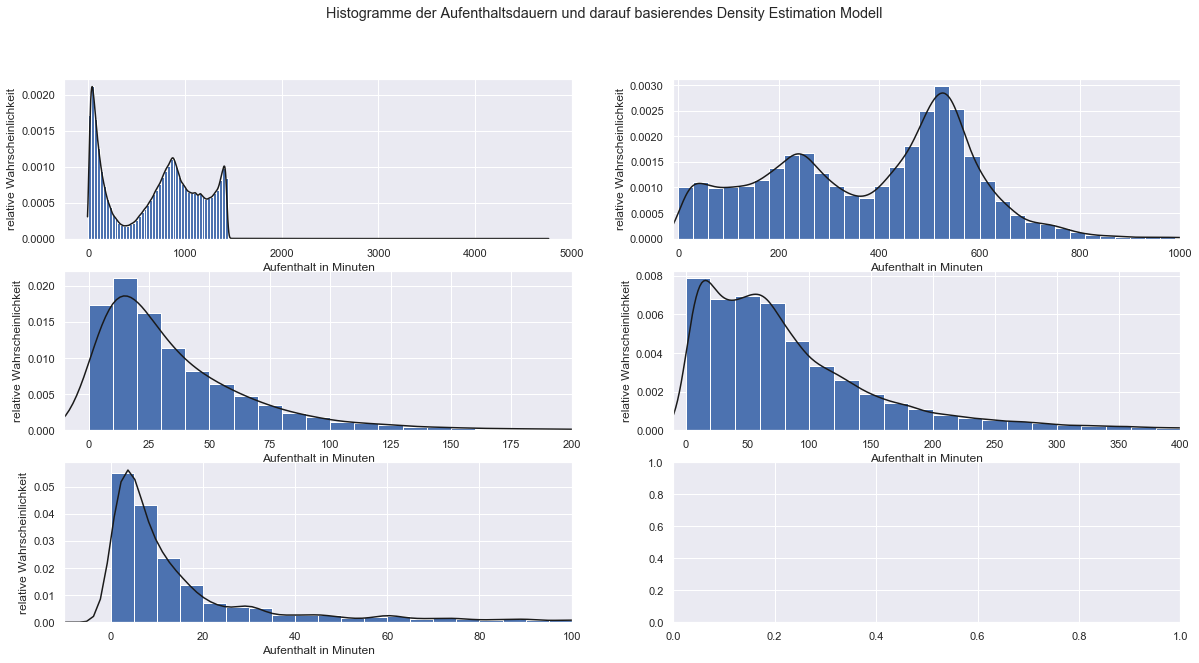

In [6]:
sns.set()
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,10))

ax1.hist(aufenthalt_zuhause, bins=range(int(min(aufenthalt_zuhause)), int(max(aufenthalt_zuhause)), 30), density=True);
ax1.plot(x_1, kde_zuhause_pdf, '-k');
ax1.set_xlabel("Aufenthalt in Minuten");
ax1.set_ylabel("relative Wahrscheinlichkeit");

ax2.hist(aufenthalt_arbeit, bins=range(int(min(aufenthalt_arbeit)), int(max(aufenthalt_arbeit)), 30), density=True);
ax2.plot(x_2, kde_arbeit_pdf, '-k');
ax2.set_xlim(-10, 1000)
ax2.set_xlabel("Aufenthalt in Minuten");
ax2.set_ylabel("relative Wahrscheinlichkeit");

ax3.hist(aufenthalt_einkaufen, bins=range(int(min(aufenthalt_einkaufen)), int(max(aufenthalt_einkaufen)), 10), density=True);
ax3.plot(x_3, kde_einkaufen_pdf, '-k');
ax3.set_xlim(-10, 200)
ax3.set_xlabel("Aufenthalt in Minuten");
ax3.set_ylabel("relative Wahrscheinlichkeit");

ax4.hist(aufenthalt_freizeit, bins=range(int(min(aufenthalt_freizeit)), int(max(aufenthalt_freizeit)), 20), density=True);
ax4.plot(x_4, kde_freizeit_pdf, '-k');
ax4.set_xlim(-10, 400)
ax4.set_xlabel("Aufenthalt in Minuten");
ax4.set_ylabel("relative Wahrscheinlichkeit");

ax5.hist(aufenthalt_sonstiges, bins=range(int(min(aufenthalt_sonstiges)), int(max(aufenthalt_sonstiges)), 5), density=True);
ax5.plot(x_5, kde_sonstiges_pdf, '-k');
ax5.set_xlim(-10, 100)
ax5.set_xlabel("Aufenthalt in Minuten");
ax5.set_ylabel("relative Wahrscheinlichkeit");

fig.suptitle("Histogramme der Aufenthaltsdauern und darauf basierendes Density Estimation Modell");


## Laden der Ausgangsdaten

In [7]:
path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Modelle_Aufenthaltsdauer_Werktag.pickle"
orig_stay_duration_model = pickle.load(open(path, "rb"))

## Umwandeln in visualisierbare PDF

In [8]:
log_pdf = orig_stay_duration_model[0].score_samples(x_1[:, np.newaxis])
orig_stay_duration_model[0] = np.exp(log_pdf)

log_pdf = orig_stay_duration_model[1].score_samples(x_2[:, np.newaxis])
orig_stay_duration_model[1] = np.exp(log_pdf)

log_pdf = orig_stay_duration_model[2].score_samples(x_3[:, np.newaxis])
orig_stay_duration_model[2] = np.exp(log_pdf)

log_pdf = orig_stay_duration_model[3].score_samples(x_4[:, np.newaxis])
orig_stay_duration_model[3] = np.exp(log_pdf)

log_pdf = orig_stay_duration_model[4].score_samples(x_5[:, np.newaxis])
orig_stay_duration_model[4] = np.exp(log_pdf)

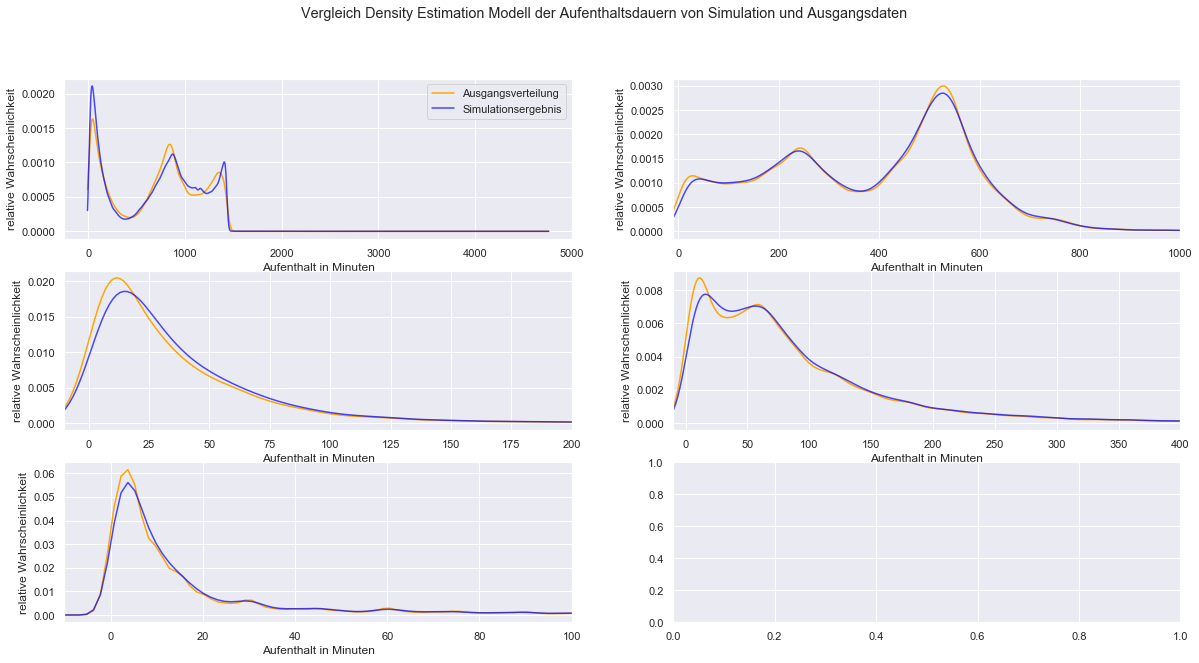

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,10))

ax1.plot(x_1, orig_stay_duration_model[0], '-k', label="Ausgangsverteilung", color="orange");
ax1.plot(x_1, kde_zuhause_pdf, '-k', label="Simulationsergebnis", color="blue", alpha= 0.7);
ax1.set_xlabel("Aufenthalt in Minuten");
ax1.set_ylabel("relative Wahrscheinlichkeit");
ax1.legend()

ax2.plot(x_2, orig_stay_duration_model[1], '-k', color="orange");
ax2.plot(x_2, kde_arbeit_pdf, '-k', color="blue", alpha= 0.7);
ax2.set_xlim(-10, 1000)
ax2.set_xlabel("Aufenthalt in Minuten");
ax2.set_ylabel("relative Wahrscheinlichkeit");

ax3.plot(x_3, orig_stay_duration_model[2], '-k', color="orange");
ax3.plot(x_3, kde_einkaufen_pdf, '-k', color="blue", alpha= 0.7);
ax3.set_xlim(-10, 200)
ax3.set_xlabel("Aufenthalt in Minuten");
ax3.set_ylabel("relative Wahrscheinlichkeit");

ax4.plot(x_4, orig_stay_duration_model[3], '-k', color="orange");
ax4.plot(x_4, kde_freizeit_pdf, '-k', color="blue", alpha= 0.7);
ax4.set_xlim(-10, 400)
ax4.set_xlabel("Aufenthalt in Minuten");
ax4.set_ylabel("relative Wahrscheinlichkeit");

ax5.plot(x_5, orig_stay_duration_model[4], '-k', color="orange");
ax5.plot(x_5, kde_sonstiges_pdf, '-k', color="blue", alpha= 0.7);
ax5.set_xlim(-10, 100)
ax5.set_xlabel("Aufenthalt in Minuten");
ax5.set_ylabel("relative Wahrscheinlichkeit");

fig.suptitle("Vergleich Density Estimation Modell der Aufenthaltsdauern von Simulation und Ausgangsdaten");

In [10]:
path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Histogramme_Aufenthaltsdauer_Werktag.pickle"
orig_aufenthaltsdauern = pickle.load(open(path, "rb"))

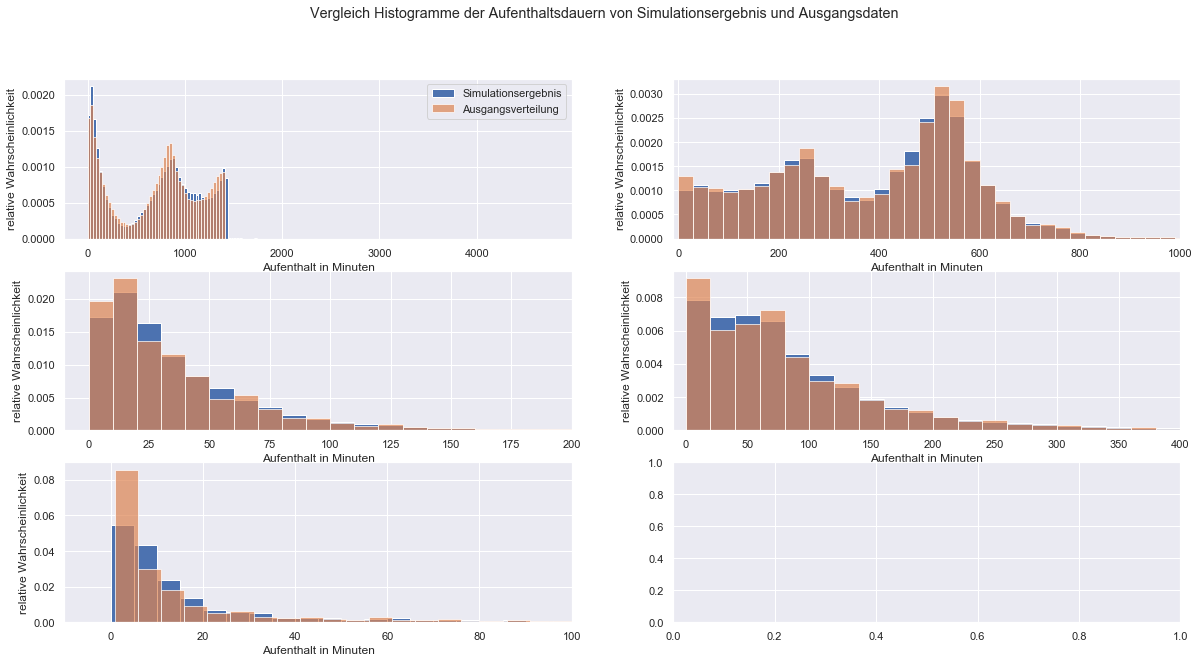

In [11]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,10))

ax1.hist(aufenthalt_zuhause, label="Simulationsergebnis", bins=range(int(min(aufenthalt_zuhause)), int(max(aufenthalt_zuhause)), 30), density=True);
ax1.hist(orig_aufenthaltsdauern[0], label="Ausgangsverteilung", bins=range(int(min(orig_aufenthaltsdauern[0])), int(max(orig_aufenthaltsdauern[0])), 30), alpha =0.7, density=True);
ax1.set_xlabel("Aufenthalt in Minuten");
ax1.set_ylabel("relative Wahrscheinlichkeit");
ax1.legend()

ax2.hist(aufenthalt_arbeit, bins=range(int(min(aufenthalt_arbeit)), int(max(aufenthalt_arbeit)), 30), density=True);
ax2.hist(orig_aufenthaltsdauern[1], bins=range(int(min(orig_aufenthaltsdauern[1])), int(max(orig_aufenthaltsdauern[1])), 30), alpha =0.7, density=True);
ax2.set_xlim(-10, 1000)
ax2.set_xlabel("Aufenthalt in Minuten");
ax2.set_ylabel("relative Wahrscheinlichkeit");

ax3.hist(aufenthalt_einkaufen, bins=range(int(min(aufenthalt_einkaufen)), int(max(aufenthalt_einkaufen)), 10), density=True);
ax3.hist(orig_aufenthaltsdauern[2], bins=range(int(min(orig_aufenthaltsdauern[2])), int(max(orig_aufenthaltsdauern[2])), 10), alpha =0.7, density=True);
ax3.set_xlim(-10, 200)
ax3.set_xlabel("Aufenthalt in Minuten");
ax3.set_ylabel("relative Wahrscheinlichkeit");

ax4.hist(aufenthalt_freizeit, bins=range(int(min(aufenthalt_freizeit)), int(max(aufenthalt_freizeit)), 20), density=True);
ax4.hist(orig_aufenthaltsdauern[3], bins=range(int(min(orig_aufenthaltsdauern[3])), int(max(orig_aufenthaltsdauern[3])), 20), alpha =0.7, density=True);
ax4.set_xlim(-10, 400)
ax4.set_xlabel("Aufenthalt in Minuten");
ax4.set_ylabel("relative Wahrscheinlichkeit");

ax5.hist(aufenthalt_sonstiges, bins=range(int(min(aufenthalt_sonstiges)), int(max(aufenthalt_sonstiges)), 5), density=True);
ax5.hist(orig_aufenthaltsdauern[4], bins=range(int(min(orig_aufenthaltsdauern[4])), int(max(orig_aufenthaltsdauern[4])), 5),alpha =0.7, density=True);
ax5.set_xlim(-10, 100)
ax5.set_xlabel("Aufenthalt in Minuten");
ax5.set_ylabel("relative Wahrscheinlichkeit");

fig.suptitle("Vergleich Histogramme der Aufenthaltsdauern von Simulationsergebnis und Ausgangsdaten");